In [1]:
import pandas as pd

Anger_data = pd.read_csv('face_analysis_results_anger.csv')
Contempt_data = pd.read_csv('face_analysis_results_contempt.csv')
Disgust_data = pd.read_csv('face_analysis_results_disgust.csv')
Fear_data = pd.read_csv('face_analysis_results_fear.csv')
Happy_data = pd.read_csv('face_analysis_results_happy.csv')
Neutral_data = pd.read_csv('face_analysis_results_neutral.csv')
Sad_data = pd.read_csv('face_analysis_results_sad.csv')
Surprise_data = pd.read_csv('face_analysis_results_surprise.csv')

Automated_data = pd.concat([
    Anger_data, 
    Contempt_data, 
    Disgust_data, 
    Fear_data, 
    Happy_data, 
    Neutral_data, 
    Sad_data, 
    Surprise_data
], ignore_index=True)


# Save the combined DataFrame to a new CSV file
Automated_data.to_csv('combined_face_analysis_results.csv', index=False)
Automated_data.shape

(14518, 5)

In [3]:
import pandas as pd

# Assuming 'combined_data' is your DataFrame with an 'Age' column
# Define age bins and labels
bins = [-1, 1, 9, 19, 29, 49, 65, float('inf')]
labels = [
    'baby (0-1)',
    'child (1-9)',
    'adolescent (10-19)',
    'young adult (20-29)',
    'middle-aged (30-49)',
    'older adult (50-65)',
    'elderly (65+)'
]

# Use pd.cut() to categorize ages into bins
Automated_data['Age Group'] = pd.cut(Automated_data['Age'], bins=bins, labels=labels)

# Save the updated DataFrame to a new CSV file if needed
Automated_data.to_csv('combined_face_analysis_with_age_groups.csv', index=False)

Automated_data.head()

,Image,Age,Gender,Race,Emotion,Age Group
0,anger_-_image0000006.jpg,30,Woman,white,neutral,middle-aged (30-49)
1,anger_-_image0000060.jpg,34,Man,white,neutral,middle-aged (30-49)
2,anger_-_image0000061.jpg,44,Man,white,happy,middle-aged (30-49)
3,anger_-_image0000066.jpg,49,Man,white,sad,middle-aged (30-49)
4,anger_-_image0000106.jpg,30,Man,black,angry,middle-aged (30-49)


Gender Distribution:
Man      9526
Woman    4992
Name: Gender, dtype: int64

Race (Ethnicity) Distribution:
white              7890
asian              2251
latino hispanic    1783
middle eastern     1194
black              1058
indian              342
Name: Race, dtype: int64

Age Group Distribution:
count                   14518
unique                      5
top       middle-aged (30-49)
freq                     8384
Name: Age Group, dtype: object


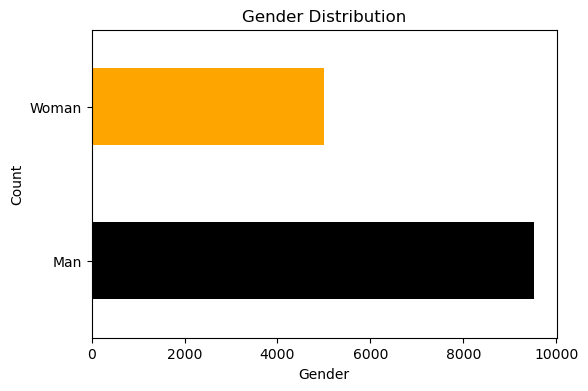

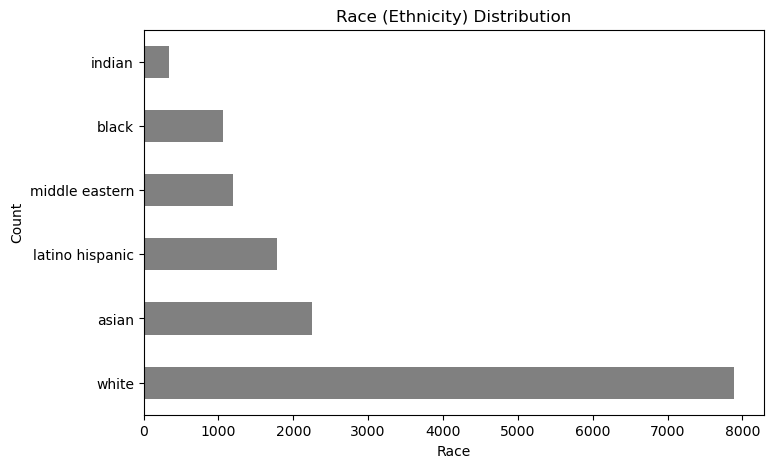

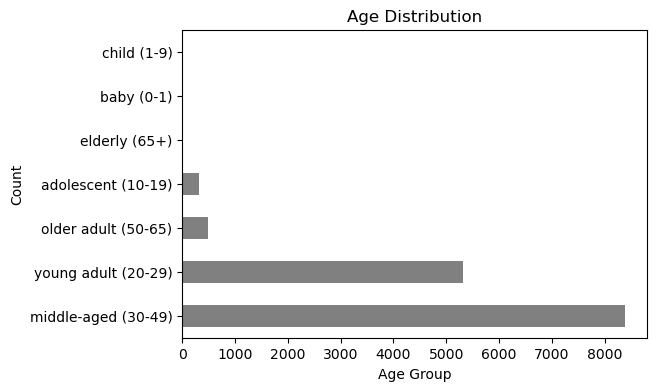


Gender Bias (Percentage):
Man      65.615098
Woman    34.384902
Name: Gender, dtype: float64

Race Bias (Percentage):
white              54.346329
asian              15.504890
latino hispanic    12.281306
middle eastern      8.224273
black               7.287505
indian              2.355696
Name: Race, dtype: float64
Age Group Distribution (Percentage):
middle-aged (30-49)    57.749001
young adult (20-29)    36.678606
older adult (50-65)     3.354457
adolescent (10-19)      2.135280
elderly (65+)           0.082656
baby (0-1)              0.000000
child (1-9)             0.000000
Name: Age Group, dtype: float64


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

combined_data=Automated_data

# Display basic statistics for gender, race, and age
print("Gender Distribution:")
print(combined_data['Gender'].value_counts())

print("\nRace (Ethnicity) Distribution:")
print(combined_data['Race'].value_counts())

print("\nAge Group Distribution:")
print(combined_data['Age Group'].describe())

# Create a bar plot for gender distribution
plt.figure(figsize=(6, 4))
combined_data['Gender'].value_counts().plot(kind='barh', color=['black', 'orange'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Create a bar plot for race distribution
plt.figure(figsize=(8, 5))
combined_data['Race'].value_counts().plot(kind='barh', color='gray')
plt.title('Race (Ethnicity) Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()

# Create a histogram for age distribution
plt.figure(figsize=(6, 4))
combined_data['Age Group'].value_counts().plot(kind='barh', color='gray')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
#plt.xticks(rotation=45)
plt.show()

# Additional Statistics for Bias Assessment
# Calculate gender bias: percentage of male vs. female
gender_counts = combined_data['Gender'].value_counts(normalize=True) * 100
print("\nGender Bias (Percentage):")
print(gender_counts)

# Calculate race bias: percentage distribution for each race
race_counts = combined_data['Race'].value_counts(normalize=True) * 100
print("\nRace Bias (Percentage):")
print(race_counts)

age_group_counts = combined_data['Age Group'].value_counts(normalize=True) * 100

# Display the percentage distribution of each age group
print("Age Group Distribution (Percentage):")
print(age_group_counts)


# What is the accuracy?

In [ ]:
# List of DataFrames to merge
dfs = [annot1_data, annot2_data, Test_data]

# Merge all DataFrames on 'Image' using reduce and pd.merge
merged_data = reduce(lambda left, right: pd.merge(left, right, on='Image'), dfs)

# Optionally, save the merged data to a new CSV file
merged_data.to_csv('merged_annotations_and_analysis.csv', index=False)

# Rename columns for clarity
merged_data = merged_data.rename(columns={
    'Age_x': 'Age_manual_1',
    'Gender_x': 'Gender_manual_1',
    'Race_x': 'Race_manual_1',
    'Annotation_by_x': 'Annotation_by_manual_1',
    'Age_y': 'Age_manual_2',
    'Gender_y': 'Gender_manual_2',
    'Race_y': 'Race_manual_2',
    'Annotation_by_y': 'Annotation_by_manual_2',
    'Age': 'Age_automatic',
    'Gender': 'Gender_automatic',
    'Race': 'Race_automatic'
})

# Define a function to create age groups
def create_age_group(age):
    if age < 20:
        return '0-19'
    elif 20 <= age < 30:
        return '20-29'
    elif 30 <= age < 40:
        return '30-39'
    elif 40 <= age < 50:
        return '40-49'
    elif 50 <= age < 60:
        return '50-59'
    else:
        return '60+'

# Apply the age group function to all age columns (manual and automatic)
merged_data['Age_group_manual_1'] = merged_data['Age_manual_1'].apply(create_age_group)
merged_data['Age_group_manual_2'] = merged_data['Age_manual_2'].apply(create_age_group)
merged_data['Age_group_automatic'] = merged_data['Age_automatic'].apply(create_age_group)

merged_data

# 1. (Dis)agreement Metrics:
We’ll calculate the agreement between the two manual annotations and the automatic annotations for Gender, Race, and Age.

Gender Agreement:
- Manual 1 vs Automatic
- Manual 2 vs Automatic

Race Agreement:
- Manual 1 vs Automatic
- Manual 2 vs Automatic

In [ ]:
# Gender agreement between Manual 1 and Automatic
gender_agreement_manual1_automatic = (merged_data['Gender_manual_1'] == merged_data['Gender_automatic']).mean() * 100

# Gender agreement between Manual 2 and Automatic
gender_agreement_manual2_automatic = (merged_data['Gender_manual_2'] == merged_data['Gender_automatic']).mean() * 100

print(f"Gender Agreement between Manual 1 and Automatic: {gender_agreement_manual1_automatic}%")
print(f"Gender Agreement between Manual 2 and Automatic: {gender_agreement_manual2_automatic}%")

# Race agreement between Manual 1 and Automatic
race_agreement_manual1_automatic = (merged_data['Race_manual_1'] == merged_data['Race_automatic']).mean() * 100

# Race agreement between Manual 2 and Automatic
race_agreement_manual2_automatic = (merged_data['Race_manual_2'] == merged_data['Race_automatic']).mean() * 100

print(f"Race Agreement between Manual 1 and Automatic: {race_agreement_manual1_automatic}%")
print(f"Race Agreement between Manual 2 and Automatic: {race_agreement_manual2_automatic}%")

# Calculate agreement between Manual 1 and Automatic for Age Groups
age_group_agreement_manual1_automatic = (merged_data['Age_group_manual_1'] == merged_data['Age_group_automatic']).mean() * 100

# Calculate agreement between Manual 2 and Automatic for Age Groups
age_group_agreement_manual2_automatic = (merged_data['Age_group_manual_2'] == merged_data['Age_group_automatic']).mean() * 100

# Calculate agreement between Manual 1 and Manual 2 for Age Groups
age_group_agreement_manual1_manual2 = (merged_data['Age_group_manual_1'] == merged_data['Age_group_manual_2']).mean() * 100

# Display the results
print(f"Age Group Agreement between Manual 1 and Automatic: {age_group_agreement_manual1_automatic}%")
print(f"Age Group Agreement between Manual 2 and Automatic: {age_group_agreement_manual2_automatic}%")
print(f"Age Group Agreement between Manual 1 and Manual 2: {age_group_agreement_manual1_manual2}%")


# 2. Bias Detection:
To investigate bias, we can check if certain races are consistently over/underpredicted compared to manual annotations. 

In [ ]:
# Bias in Race predictions (Manual 1 vs Automatic)
race_bias_manual1_automatic = merged_data.groupby(['Race_manual_1', 'Race_automatic']).size().unstack(fill_value=0)
print("Race Bias (Manual 1 vs Automatic):")
print(race_bias_manual1_automatic)

# Bias in Race predictions (Manual 2 vs Automatic)
race_bias_manual2_automatic = merged_data.groupby(['Race_manual_2', 'Race_automatic']).size().unstack(fill_value=0)
print("Race Bias (Manual 2 vs Automatic):")
print(race_bias_manual2_automatic)

# 3. Agreement Metrics by Category:
You can calculate agreement by category (e.g., by Gender or Race) to see how well the automatic system agrees with manual annotations in specific subgroups.

Agreement by Gender:

In [ ]:
# Agreement by Gender (Manual 1 vs Automatic)
gender_group_agreement_manual1 = merged_data.groupby('Gender_manual_1').apply(
    lambda x: (x['Gender_manual_1'] == x['Gender_automatic']).mean() * 100)

# Agreement by Gender (Manual 2 vs Automatic)
gender_group_agreement_manual2 = merged_data.groupby('Gender_manual_2').apply(
    lambda x: (x['Gender_manual_2'] == x['Gender_automatic']).mean() * 100)

print("Gender Agreement by Gender (Manual 1 vs Automatic):")
print(gender_group_agreement_manual1)

print("Gender Agreement by Gender (Manual 2 vs Automatic):")
print(gender_group_agreement_manual2)


In [ ]:
# Agreement by Race (Manual 1 vs Automatic)
race_group_agreement_manual1 = merged_data.groupby('Race_manual_1').apply(
    lambda x: (x['Race_manual_1'] == x['Race_automatic']).mean() * 100)

# Agreement by Race (Manual 2 vs Automatic)
race_group_agreement_manual2 = merged_data.groupby('Race_manual_2').apply(
    lambda x: (x['Race_manual_2'] == x['Race_automatic']).mean() * 100)

print("Race Agreement by Race (Manual 1 vs Automatic):")
print(race_group_agreement_manual1)

print("Race Agreement by Race (Manual 2 vs Automatic):")
print(race_group_agreement_manual2)


# 4. Overall Metrics:
To compute the overall accuracy between manual annotations and automatic predictions:

In [ ]:
# Overall accuracy for Gender and Race (Manual 1 vs Automatic)
overall_accuracy_manual1 = ((merged_data['Gender_manual_1'] == merged_data['Gender_automatic']) & 
                            (merged_data['Race_manual_1'] == merged_data['Race_automatic'])).mean() * 100

# Overall accuracy for Gender and Race (Manual 2 vs Automatic)
overall_accuracy_manual2 = ((merged_data['Gender_manual_2'] == merged_data['Gender_automatic']) & 
                            (merged_data['Race_manual_2'] == merged_data['Race_automatic'])).mean() * 100

print(f"Overall Accuracy (Manual 1 vs Automatic): {overall_accuracy_manual1}%")
print(f"Overall Accuracy (Manual 2 vs Automatic): {overall_accuracy_manual2}%")


#  5. Inter-Annotator Agreement (IAA):
**Inter-annotator agreement (IAA)** is a general term referring to how much multiple annotators agree on their annotations. It measures the consistency between human annotators. The **Cohen’s Kappa score** is one way to compute inter-annotator agreement, but other methods like **Fleiss' Kappa** or **Krippendorff’s alpha** are also used for multi-annotator setups.




## 5. Cohen's Kappa:


The **Kappa score (Cohen's Kappa)** is a statistical measure used to evaluate the level of agreement between two annotators or classifiers, taking into account the possibility of agreement occurring by chance. It’s often used to assess the reliability of categorical data annotations.

### Cohen's Kappa Formula:
$$
\kappa = \frac{P_o - P_e}{1 - P_e}
$$

- $P_o$: The observed agreement (the percentage of times the annotators agreed).
- $P_e$: The expected agreement by chance (the percentage of agreement you would expect by random chance).

### Cohen's Kappa Score Interpretation:
- **1.0**: Perfect agreement.
- **0.8 to 1.0**: Almost perfect agreement.
- **0.6 to 0.8**: Substantial agreement.
- **0.4 to 0.6**: Moderate agreement.
- **0.2 to 0.4**: Fair agreement.
- **0.0 to 0.2**: Slight agreement.
- **<0.0**: Less than chance agreement (negative kappa).


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa for Age Group between Manual 1 and Automatic
kappa_manual1_automatic = cohen_kappa_score(merged_data['Age_group_manual_1'], merged_data['Age_group_automatic'])

# Calculate Cohen's Kappa for Age Group between Manual 2 and Automatic
kappa_manual2_automatic = cohen_kappa_score(merged_data['Age_group_manual_2'], merged_data['Age_group_automatic'])

# Calculate Cohen's Kappa for Age Group between Manual 1 and Manual 2
kappa_manual1_manual2 = cohen_kappa_score(merged_data['Age_group_manual_1'], merged_data['Age_group_manual_2'])

# Display the results
print(f"Cohen's Kappa (Manual 1 vs Automatic): {kappa_manual1_automatic}")
print(f"Cohen's Kappa (Manual 2 vs Automatic): {kappa_manual2_automatic}")
print(f"Cohen's Kappa (Manual 1 vs Manual 2): {kappa_manual1_manual2}")